<a href="https://colab.research.google.com/github/eduardogil11/Desarrolllo-de-aplicaciones-avanzadas-Modulo-2-IA/blob/main/Data_augmentation_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation Pokemon

### Eduardo Rodríguez Gil - A01274913

De un Dataset que ya existia obtuve varias imágenes de los diferentes Pokemon que existen y cree mi propio Dataset clasificando a los Pokemon por 3 tipos Water, Fire y Grass.

Conectamos Drive y nuestra carpeta de Drive que previamente creeamos que contiene las imagenes de los Pokemon

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Actividad Data Augmentation Pokemon"
!ls

Mounted at /content/drive
/content/drive/MyDrive/Actividad Data Augmentation Pokemon
augmented  images


En esta parte importamos las librerias que vamos a utilizar a lo largo del programa.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, models, layers
from tensorflow.math import confusion_matrix

## Transformaciones

Utilizamos TensorFlow especificamente ImageDataGenerator para crear nuevas imágenes de las que contiene nuestro Dataset de Pokemon, donde le indicamos las características que queremos que tengan. En este caso vamos a querer que nuestras imagenes se roten y cambien su pocisión entre horizontal y vertical, y las queremos casi nada estiradas, ya que no queremos que se deformen demasiado las imágenes.

In [3]:
base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							  rescale = 1./255,
							  rotation_range = 40,
							  width_shift_range = 0.2,
							  height_shift_range = 0.2,
							  shear_range = 0.3,
							  zoom_range = 0.3,
							  horizontal_flip = True)

Después utilizamos el directorio de train para probar que efectivamente las imágenes se están modificando como lo indicamos anteriormente, para esto solo vamos a ser la prueba con una imágen aleatoria de nuestro Dataset y quise mostrar como se generarían 6 imágenes diferentes con ImageDataGenerator.

Found 225 images belonging to 3 classes.


<Figure size 640x480 with 0 Axes>

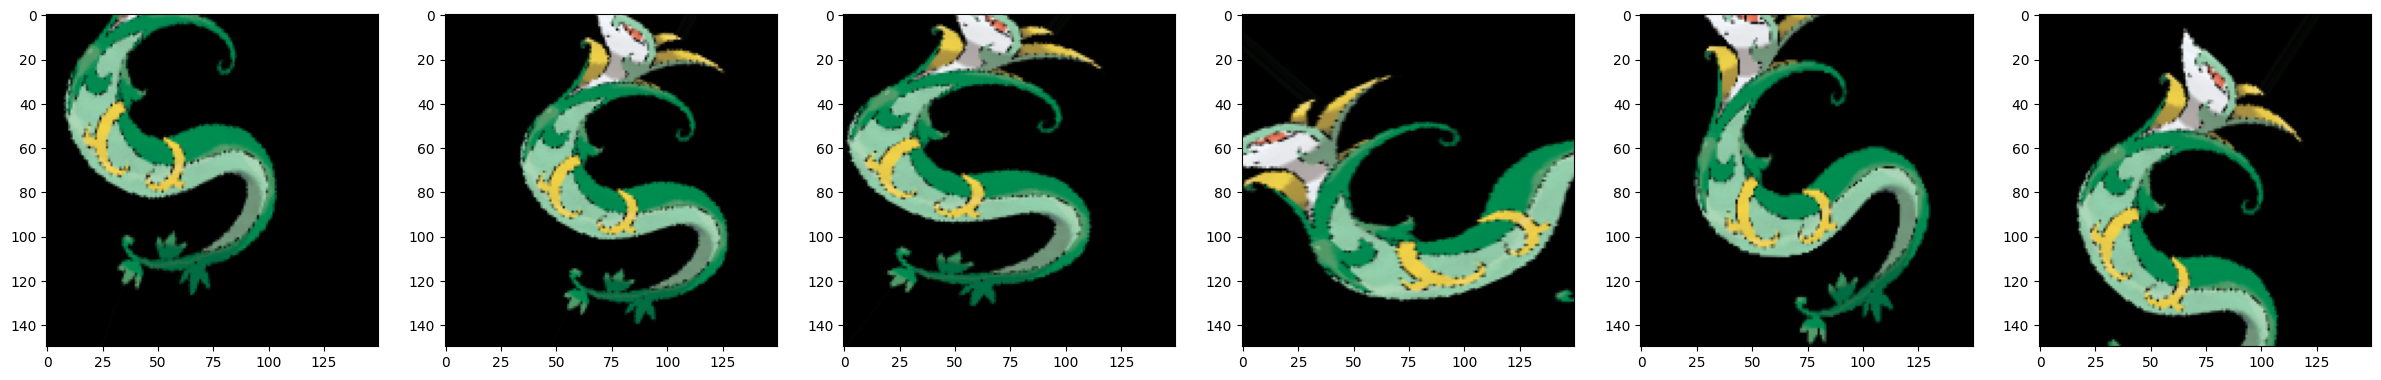

In [4]:
train_generator = train_datagen.flow_from_directory(
									train_dir,
									target_size = (150, 150),
									batch_size = 1,
									class_mode ='categorical')

plt.figure()
f, axarr = plt.subplots(1, 6, figsize=(30, 8)) 

for i in range(6) :
  axarr[i].imshow(train_generator[0][0][0])

Para este punto vamos a realizar lo mismo que realizamos anteriormente pero ahora mostrando 10 imágenes que se modificarán solo una vez y como podemos observar agarra aleatoriamente de nuestro Dataset de cualquier tipo de Pokemon.

Found 225 images belonging to 3 classes.
(10, 150, 150, 3)


<Figure size 640x480 with 0 Axes>

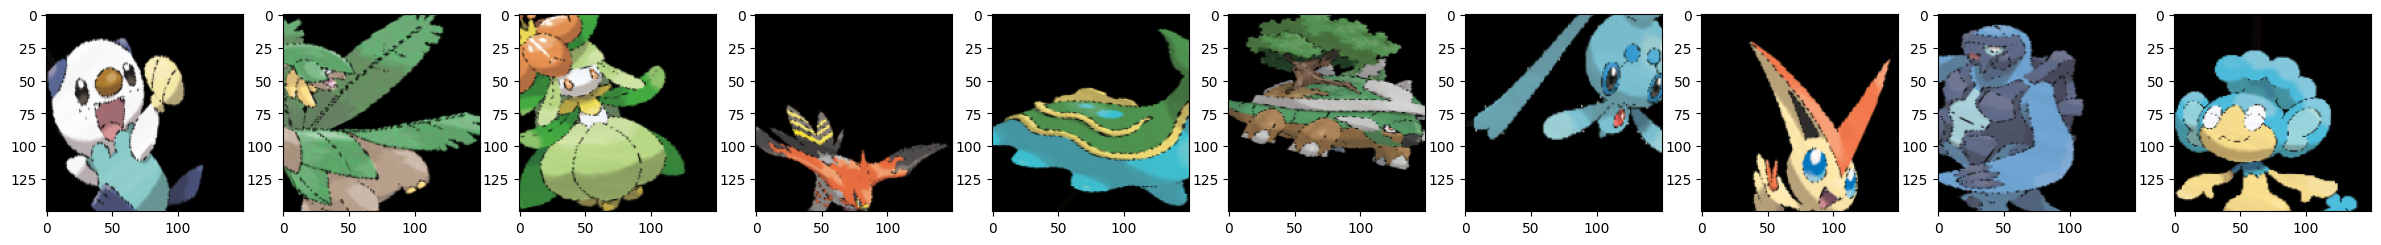

In [5]:
train_generator = train_datagen.flow_from_directory(
									train_dir,
									target_size = (150, 150),
									batch_size = 10,
									class_mode ='categorical')

images , labels = train_generator[0]

print(images.shape)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

Aquí vamos a indicarle que nos guarde todas nuestras imágenes que se generen por el ImageDataGenerator en una carpeta ya antes creada llamada augmented, aún que la podemos llamar como queramos. Esto nos servira si es que queremos posteriormente revisar con que imágenes entreno el modelo y como fueron las nuevas imágenes que género.

In [6]:
path = "/content/drive/MyDrive/Actividad Data Augmentation Pokemon"
train_generator = train_datagen.flow_from_directory(
									train_dir,
									target_size = (150, 150),
									batch_size = 8,
									class_mode ='categorical',
									save_to_dir= path + '/augmented',   
             		 	save_prefix='aug',
              		save_format='png')

Found 225 images belonging to 3 classes.


## Modelos

Para esta parte probre con tres modelos diferentes, para poder ver diferentes resultados. Al inicio se tenían 4 clases la Electric, Fire, Grass y Water de los Pokemon, pero como podemos observar en la siguiente matriz de confusión al momento de entrenar con los modelos nos daba un mal entrenamiento y salian con overfitting, ya al vizualizar nuestra matriz podiamos obsevar como la clase de Electric confundía mucho y estos podian ser unos problemas que llegara a causar el overfitting, por lo que se decidio quitar para quedarnos con 3 clases.

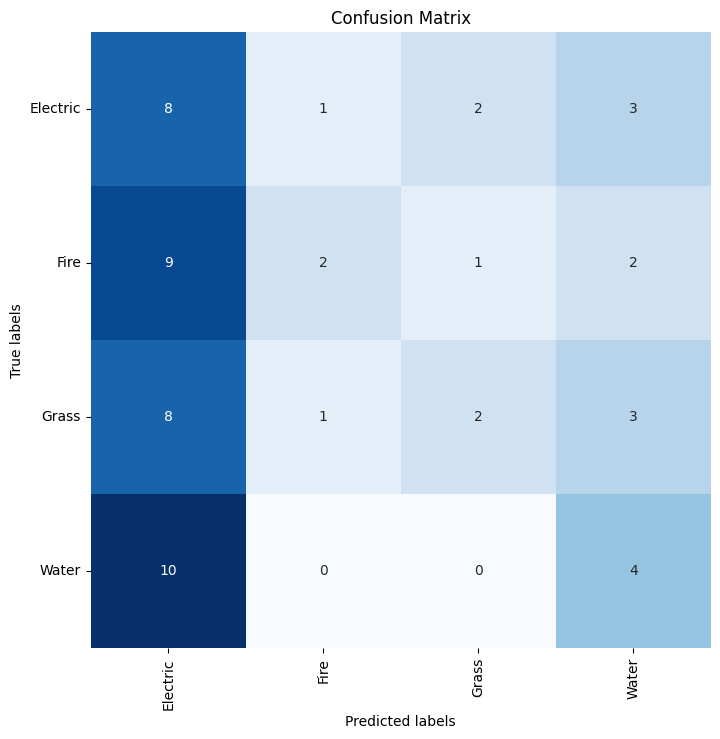

### Red neuronal Convolucional

Primero se realizo un red neuronal convolucional con tres capas convolucionales, 2 capas densas y se puso un dropout para evitar el overfitting.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_13 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_14 (Bat  (None, 72, 72, 64)       256       
 chNormalization)                                                
                                                      

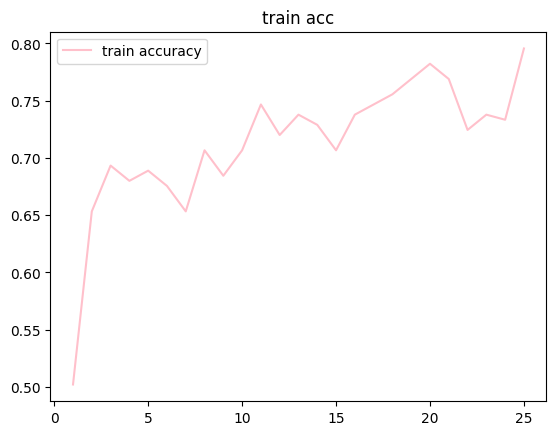

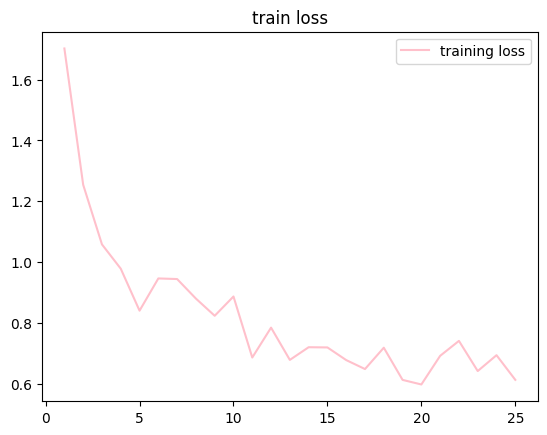

Found 42 images belonging to 3 classes.
 2/25 [=>............................] - ETA: 1s - loss: 454.0421 - acc: 0.6250

25/25 [==============================] - 0s 4ms/step - loss: 434.3227 - acc: 0.6190

test acc :
 0.6190476417541504


In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

history = model.fit(train_generator, epochs = 25)
			
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'-',label='train accuracy', color='pink')
plt.title('train acc')
plt.legend()
plt.figure()

plt.plot(epochs,loss, '-', label ='training loss', color='pink')
plt.title('train loss')
plt.legend()
plt.show()

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

Como podemos observar este modelo nos dio accuracy de 79 en el entrenamiento y en el test nos dio un accuracy de 61, a lo que podriamos decir que tenemos un modelo con overfitting.

3/3 [==============================] - 0s 57ms/step


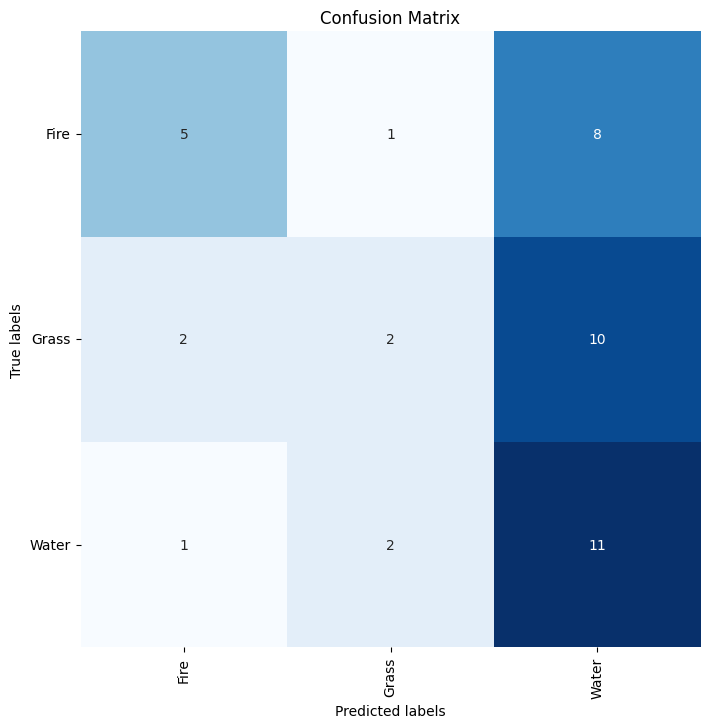

In [26]:
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticklabels(class_labels, rotation=0)
plt.show()
     

Al observar esta matiz de confusión podemos ver que en la clase Water se concentran la mayor parte de los Pokemon, aunque en las demás clases igual cuentan con unos pocos.

### Modelo VGG16

Para esta parte decidi probar con un modelo ya entrenado anteriormente con diferentes dataset, para ver si lograba predecir mejor a los Pokemon en este caso decidi utilizar VGG16 la cual es una red nueronal que cuenta con 16 capas de profundidad conectadas en sequencia. Esta se le hicieron unos pequeños cambios como incrementar la capa densa de 256 a 1024 y poner un dropout para evitar overfitting, pero de igual forma se cambio de sigmoid a softmax, ya que cuento con más de dos clases.

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              8389632   
                                                                 
 batch_normalization_4 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 

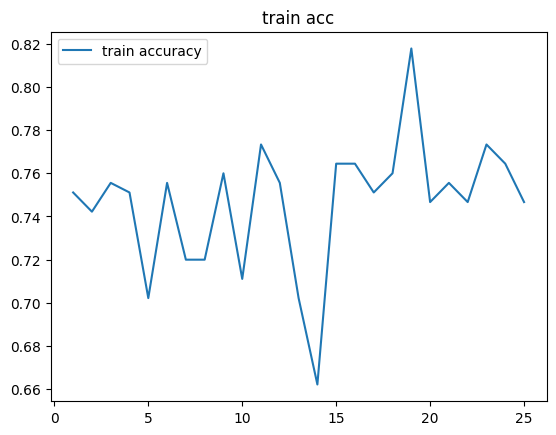

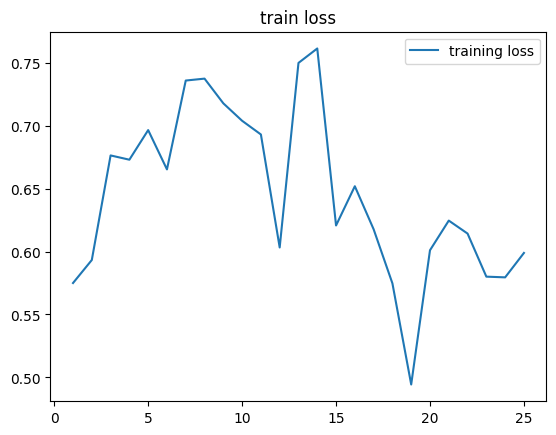

Found 42 images belonging to 3 classes.
 2/25 [=>............................] - ETA: 1s - loss: 241.5177 - acc: 0.6500

25/25 [==============================] - 0s 4ms/step - loss: 231.4420 - acc: 0.6429

test acc :
 0.6428571343421936


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150,150,3))
base_model.trainable = False ## Not trainable weights
  
model_VGG16 = models.Sequential()
model_VGG16.add(base_model)
model_VGG16.add(layers.Flatten())
model_VGG16.add(layers.Dense(1024, activation='relu'))
model_VGG16.add(layers.BatchNormalization())
model_VGG16.add(layers.Dropout(0.5))
model_VGG16.add(layers.Dense(3,activation='softmax'))

model_VGG16.summary()

model_VGG16.compile(loss='categorical_crossentropy',
						optimizer = optimizers.Adam(learning_rate=0.001),
						metrics=['acc'])



history = model.fit(
						train_generator, 
						epochs = 25)
							
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'-',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, '-', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

test_datagen_VGG16 = ImageDataGenerator(1./255)
test_generator_VGG16 = test_datagen_VGG16.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'categorical')

test_loss_VGG16, test_acc_VGG16 = model.evaluate(test_generator_VGG16, steps = 25)
print('\ntest acc :\n', test_acc_VGG16)

Como podemos obsevar en el entrenamiento nos dio un accuracy de 74, y un test acurracy de 64 estando muy cerca al entrenamiento, pero de igual forma el modelo sigue teniendo overfitting.

3/3 [==============================] - 2s 280ms/step


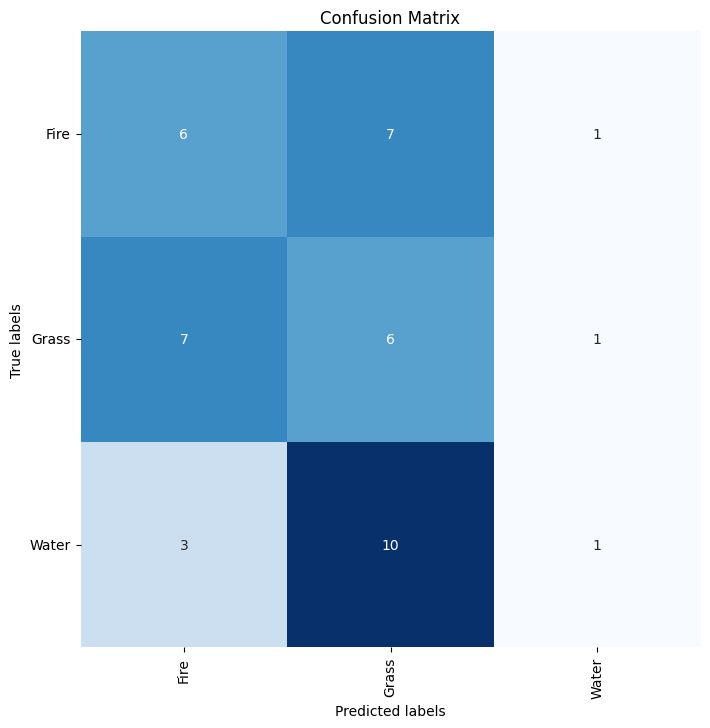

In [10]:
true_labels = test_generator_VGG16.classes
class_labels = list(test_generator_VGG16.class_indices.keys())
predictions = model_VGG16.predict(test_generator_VGG16)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticklabels(class_labels, rotation=0)
plt.show()

Al observar esta matiz de confusión nos da una mejor predicción en las clases de Fire y Grass, el problema es que en la clase Water no sale casi nada, esto podriamos decir que es por el mismo problema del overffiting.

### Modelo VGG19

Al ver que modelo VGG16 logro aumentarme el accurracy, pero tuvo un test accurracy bajo decidi probrar con otro modelo similar al VGG16 que era el modelo VGG19 que a diferencia al otro como su nombre lo dice este cuenta con 19 capas de profundidad conectadas en sequencia. En este caso decidi no tocar la capa densa, pero agregue dos dropout para no tener tanto overfitting como del modelo pasado y de igual forma modifique el sigmoid a softmax por la cantidad de clases que tengo.

80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                       

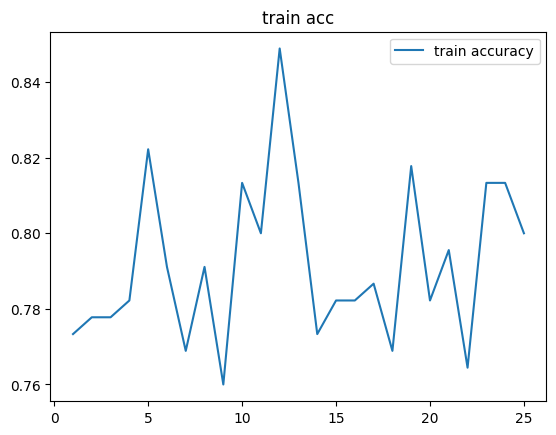

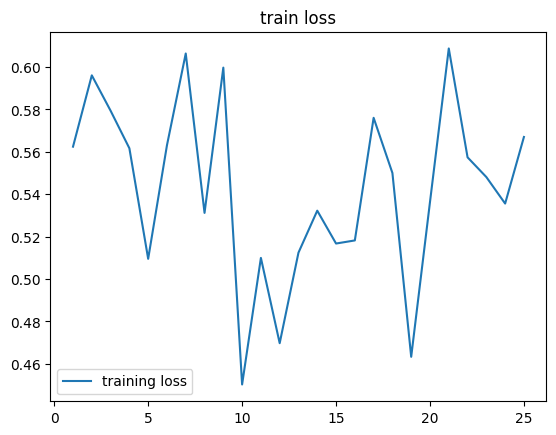

Found 42 images belonging to 3 classes.
 2/25 [=>............................] - ETA: 1s - loss: 288.0501 - acc: 0.5500

25/25 [==============================] - 0s 4ms/step - loss: 274.3335 - acc: 0.5714

test acc :
 0.5714285969734192


In [11]:
from tensorflow.keras.applications.vgg19 import VGG19

## Loading VGG19 model
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(150,150,3))
base_model.trainable = False ## Not trainable weights
  
model_VGG19 = models.Sequential()
model_VGG19.add(base_model)
model_VGG19.add(layers.Flatten())
model_VGG19.add(layers.Dense(256,activation='relu'))
model_VGG19.add(layers.Dropout(0.5))
model_VGG19.add(layers.Dropout(0.5))
model_VGG19.add(layers.Dense(3 ,activation='softmax'))

model_VGG19.summary()

model_VGG19.compile(loss='categorical_crossentropy',
						optimizer = optimizers.Adam(learning_rate=0.001),
						metrics=['acc'])



history = model.fit(
						train_generator, 
						epochs = 25)
							
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'-',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, '-', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

test_datagen_VGG19 = ImageDataGenerator(1./255)
test_generator_VGG19 = test_datagen_VGG19.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'categorical')

test_loss_VGG19, test_acc_VGG19 = model.evaluate(test_generator_VGG19, steps = 25)
print('\ntest acc :\n', test_acc_VGG19)

Como podemos observar en este modelo nuestro accurracy de entramiento fue de 80 aumentado a diferencia del modelo VGG16, pero nuestro test acurracy era más alto en el modelo VGG16, ya que en este nos dio 57 y seguimos teniendo overffiting.

3/3 [==============================] - 0s 100ms/step


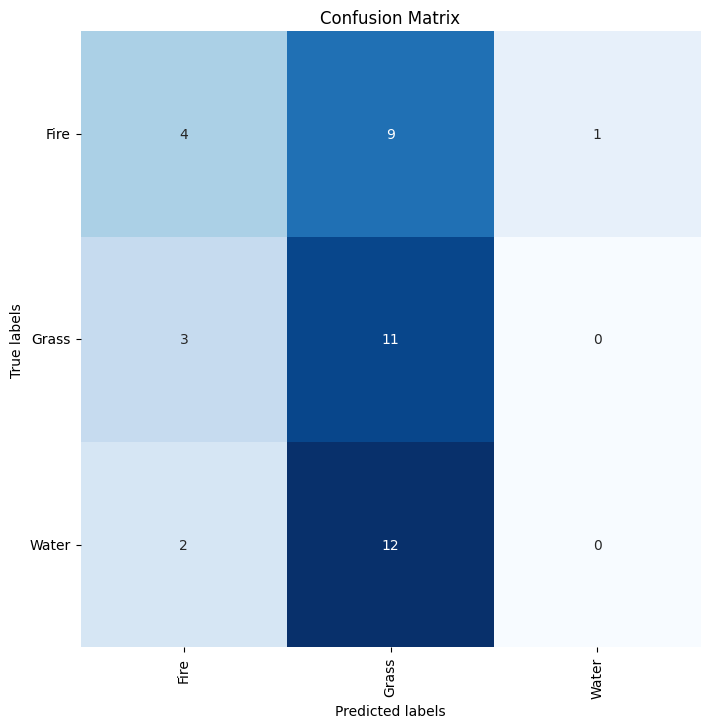

In [12]:
true_labels = test_generator_VGG19.classes
class_labels = list(test_generator_VGG19.class_indices.keys())
predictions = model_VGG19.predict(test_generator_VGG19)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticklabels(class_labels, rotation=0)
plt.show()

Aunque podemos observar que acomparación del modelo VGG16 que no nos había salido casi nada en la clase Grass, en el modelo VGG19 nos salio casi todo en la clase Grass y podemos decir que este sigue siendo un problema del overfitting del modelo.

## Comparación

In [27]:
import pandas as pd
df_comp = pd.DataFrame(columns=['Model', 'test loss', 'test accuracy'])
df_comp['Model'] = ['Red neuronal convolucional', 'VGG16', 'VGG19']
df_comp['test loss'] = [test_loss, test_loss_VGG16, test_loss_VGG19]
df_comp['test accuracy'] = [test_acc, test_acc_VGG16, test_acc_VGG19]

df_comp

,Model,test loss,test accuracy
0,Red neuronal convolucional,434.322693,0.619048
1,VGG16,231.442032,0.642857
2,VGG19,274.333466,0.571429


## Conclusiones

Como podemos observar en los tres modelos nuestro test accuracy est bastante similar en las tres situaciones saliendo como el mejor el modelo VGG16 y el peor el VGG19, pero para nuestro accuracy de entrenamiento el que llego a salir más alto fue nuestro modelo VGG19. Esto nos dice que nuestro modelo si esta llegando a aprender pero en los tres modelos llegamos a tener overffiting, esto pasa al tener unas imagenes complicadas, ya que como se menciona al inicio se contaba con una clase de Pokemon Electic, pero esta se decidio eliminar por la cantidad de problemas que causaba reconoceindo todos los Pokemon como Electric y obteniendo test accuracy super bajos como de 23. Al quitarla se logro aumentar considerablemente el test accuracy aunque todavía tenía overfitting y al visualizar las matrices de confusión podemos ver que las tres eran difentes dandonos más Pokemon en una clase que en otra. Este principal problema es por la complejidad que tiene los Pokemon, ya que si nos metemos a indagar en el dataset podemos observar que a pesar de que los Pokemon de Water son casi todos azules, los Pokemon de Fire son casi todos rojos o naranjas y los Pokemon de Grass son casi todos verdes, hay algunos Pokemon que tienen diferentes colores un ejemplo sencillo es que por ejemplo existe un Pokemon que es de tipo Water y tiene una forma de pez, pero es completamente verde, esta situación llega a suceder en las 3 clases existentes. Otro de los problemás principales que tenía la clase Electric es que los Pokemon eran casi todos amarillos, pero tenían formas super diferentes cada Pokemon como podía llegar a ser una rata amarrila, hasta podía ser un pescado blanco de tipo Electric, esto no pasa mucho en las 3 clases que se tienen, ya que casi todos los Pokemon de tipo agua tienen formas de animales maritimos, los tipos Fire y Grass tienen una forma de ser particulares cada tipo. Pienso que estos 3 tipos son más sencillos y faciles que los de más tipos de Pokemon que existen, ya que son los tipos principales del juego, pero si nos ponemos a observar en los 18 tipos de Pokemon que hay vamos a obsevar que entre más raro sea el tipo de Pokemon más complejidad va a tener.
Por último, podríamos lograr que mejoren los modelos mejorando los datos, ya que como observamos el principal problema no son los modelos porque estos si aprender, lo que podriamos hacer es agregar algo particular de cada tipo de Pokemon como sus ataques al dataset, para que este le sea más simple de identificar de que tipo de Pokemon y no se tenga el problema del overfitting.